### Classificador com Regressão Logística Binária (variável target com duas possibilidades)

#### Técnica SUPERVISIONADA para predizer a probabilidade de evento ocorrer em função de uma ou mais features métricas ou não métricas. A classificação visa determinar e inserir indivíduos em categorias específicas

Seja $s$ a probabilidade da resposta ser SIM. Então $1-s$ é a probabilidade da resposta ser NÃO. A CHANCE (odds) de ocorrência de evento é a razão entre as probabilidades, ou seja, $chance = \dfrac{s}{1-s}$

A regressão logística binária baseia-se na Distribuição de Bernouli, que é a distribuição discreta de espaço amostral {0, 1}. Seja $Z=\beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \cdots +  \beta_k x_{ki}$. Definindo o termo LOGITO como o logaritmo natural da chance de ocorrência de uma resposta do tipo SIM, tem-se:

$logito=Z=ln \left( \dfrac{s}{1-s} \right) \\$
$e^{logito} = e^Z = \dfrac{s}{1-s} \implies $
$s=\dfrac{e^Z}{1+e^Z} \implies \dfrac{1}{e^{-Z}+1}$

<img src='figlogit1.png'>

A curva descritiva assume valores entre $0$ e $1$ para $Z$ no intervalo $-\infty,+\infty$. Tem-se assim a função logística:

$s_i = \dfrac{1}{e^{-Z_i}+1} = \dfrac{1}{e^{-\left( \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \cdots +  \beta_k x_{ki} \right)}+1}$

A estimação dos parâmetros não se dá por mínimos quadrados, mas pela técnica da máxima verossimilhança (maximizar o acerto da probabilidade de ocorrência frente à sua real ocorrência). A qualidade do modelo pode ser avaliada por teste estatístico nos parâmetros e por matriz de confusão

In [1]:
#adaptado de https://www.youtube.com/watch?v=WKvrpEa-Hl0
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y = True, as_frame=True)

In [5]:
# vamos usar apenas a feature petal width (cm), e apenas as linhas do dataframe onde y é da classe 0 ou 1 (binário)

X = X.loc[y.isin([0,1]), 'petal width (cm)'].values # gera array
y = y[y.isin([0,1])].values #gera array


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

[[<matplotlib.axis.YTick at 0x1fc5e3bfdc0>,

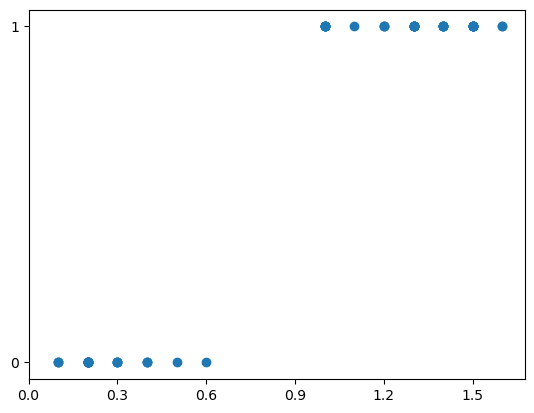

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_train, y_train)
ax.set(yticks = [0,1], xticks = [0, 0.3, 0.6, 0.9, 1.2, 1.5])

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train.reshape(-1,1), y_train)

In [13]:
# coef_angular (beta1)
clf.coef_

array([[3.90516193]])

In [20]:
# para pegar só o elemento usamos
beta1 = clf.coef_[0][0]
beta1

3.9051619328364082

In [14]:
# intercepto
clf.intercept_

array([-2.89824966])

In [21]:
# para pegar só o elemento usamos
beta0 = clf.intercept_[0]
beta0

-2.8982496571785092

In [15]:
# para traçar o gráfico da curva logística, há no pacote scipy a função expit(x) = 1 / 1+ exp(-x)
from scipy.special import expit

In [16]:
# vamos criar um array para o eixo x com 100 pontos
import numpy as np
eixo_x = np.linspace(X_train.min(), X_train.max(), 100)

In [22]:
eixo_y = expit(beta0 + beta1*eixo_x)

[[<matplotlib.axis.YTick at 0x1fc61674b80>,

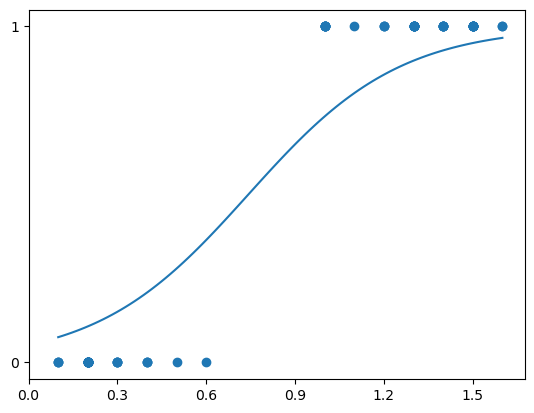

In [23]:
fig, ax = plt.subplots()
ax.scatter(X_train, y_train)
ax.plot(eixo_x, eixo_y)
ax.set(yticks = [0,1], xticks = [0, 0.3, 0.6, 0.9, 1.2, 1.5])

In [24]:
eixo_y_train = expit(beta0 + beta1*X_train)

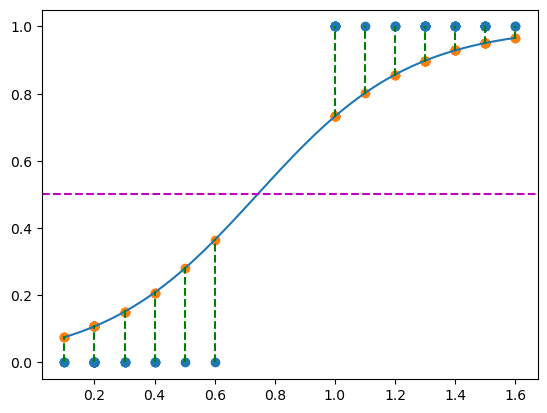

In [30]:
fig, ax = plt.subplots()
ax.scatter(X_train, y_train)
ax.plot(eixo_x, eixo_y)
ax.scatter(X_train, eixo_y_train)

#desenha linha no meio, em y=0.5
ax.axhline(y=0.5, c='m', linestyle='--')

ax.plot([0.1,0.1], [0, 0.07883025], '--g') # de 0 até a probabilidade de ser 1
ax.plot([0.2,0.2], [0, 0.11156652], '--g')
ax.plot([0.3,0.3], [0, 0.15560101], '--g')
ax.plot([0.4,0.4], [0, 0.21285167], '--g')
ax.plot([0.5,0.5], [0, 0.28408003], '--g')
ax.plot([0.6,0.6], [0, 0.36800066], '--g')

ax.plot([1,1], [0.7297,1], '--g')
ax.plot([1.1,1.1], [0.79846697, 1], '--g')
ax.plot([1.2,1.2], [0.8532, 1], '--g')
ax.plot([1.3,1.3], [0.8950, 1], '--g')
ax.plot([1.4,1.4], [0.9260, 1], '--g')
ax.plot([1.5,1.5], [0.9483, 1], '--g')
ax.plot([1.6,1.6], [0.9642, 1], '--g')


In [32]:
#Naturalmente que para os dados de treino o modelo ACERTA
clf.predict(X_train.reshape(-1,1))

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1])

In [33]:
X_train

array([0.2, 0.2, 1.6, 0.2, 1. , 0.4, 1.5, 1.4, 0.2, 0.4, 0.2, 0.2, 0.2,
       1.2, 0.2, 0.3, 1. , 0.2, 1. , 0.1, 0.2, 0.2, 0.3, 0.2, 0.2, 1.5,
       0.3, 1.3, 0.2, 1.3, 1.6, 1.3, 1.5, 0.6, 1.4, 1. , 0.2, 1.5, 1.5,
       1.3, 1. , 0.3, 1.3, 0.2, 1.1, 1. , 1.4, 0.1, 1.3, 1.4, 1.4, 1.5,
       0.1, 0.2, 0.2, 1.5, 0.4, 0.2, 0.5, 1.3, 1.4, 1.3, 1.5, 1.2, 0.2,
       1. , 1.3, 0.2, 1.2, 1.5])

In [34]:
y_train

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1])

In [35]:
# Para maior compreensão, vamos olhar só os 5 primeiros dados
clf.predict(X_train.reshape(-1,1))[0:5]

array([0, 0, 1, 0, 1])

In [36]:
X_train[0:5]

array([0.2, 0.2, 1.6, 0.2, 1. ])

In [37]:
y_train[0:5]

array([0, 0, 1, 0, 1])

In [40]:
# checando probabilidades de ser 0 / 1
clf.predict_proba(X_train.reshape(-1,1))[0:5]

array([[0.89256538, 0.10743462],
       [0.89256538, 0.10743462],
       [0.03389486, 0.96610514],
       [0.89256538, 0.10743462],
       [0.26758456, 0.73241544]])

In [41]:
# estes valores de probabilidade de ser 1 são exatamente obtidos pela expressão do logito, por exempplo, para x = 0.2

expit(beta0 + beta1*0.2)

0.10743462179898665

[[<matplotlib.axis.YTick at 0x1fc63bffd00>,

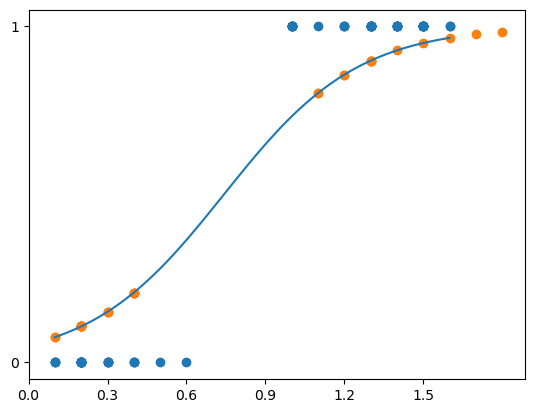

In [42]:
# agora aplicando nos dados de teste

y_pred = clf.predict_proba(X_test.reshape(-1,1))

fig, ax = plt.subplots()
ax.scatter(X_train, y_train)
ax.plot(eixo_x, eixo_y)
ax.scatter(X_test, y_pred[:,1]) # pegar apenas os pontos sobre a curva, ou seja, da probabilidade ser 1
ax.set(yticks = [0,1], xticks = [0, 0.3, 0.6, 0.9, 1.2, 1.5])

In [44]:
y_pred_valor = clf.predict(X_test.reshape(-1,1))

In [45]:
y_pred_valor

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1])

In [49]:
# avaliando o erro por matriz de confusão
from sklearn.metrics import confusion_matrix

<img src='figlogit3.jpeg'>
<img src='figlogit2.png'>

In [50]:
confusion_matrix(y_test, y_pred_valor)

array([[17,  0],
       [ 0, 13]], dtype=int64)

### Caso multinominal (mais de 2 classes) - distribuição binomial

#### Por  exemplo, no caso do dataset iris são 3 classes (0, 1, 2). Se 0 for tomada como referência, existem outras duas possibilidades de evento em relação a esta categoria. São portanto dois logitos

$Z_{1i}=\beta_0 + \beta_{11} x_{1i} + \cdots +  \beta_{k1} x_{ki} \\$
$Z_{2i}=\beta_1 + \beta_{12} x_{1i} + \cdots +  \beta_{k2} x_{ki} $

Seja $s_i = \dfrac{e^{Z_{i}}}{e^{Z_i}+1}$ a probabilidade de ocorrência do evento

Probabilidade de ocorrência do evento 0 (ref): $P_{i_{0}} = \dfrac{1}{1+e^{Z_{1i}} + e^{Z_{2i}}}$

Probabilidade de ocorrência do evento 1 (ref): $P_{i_{1}} = \dfrac{e^{Z_{1i}}}{1+e^{Z_{1i}} + e^{Z_{2i}}}$

Probabilidade de ocorrência do evento 2 (ref): $P_{i_{2}} = \dfrac{e^{Z_{2i}}}{1+e^{Z_{1i}} + e^{Z_{2i}}}$



In [51]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y = True, as_frame=True)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [54]:
modelo_2 = LogisticRegression(random_state=0).fit(X_train, y_train) #em caso de erro de convergência, max_iter = 1000 etc.

In [55]:
modelo_2.coef_

array([[-0.40460836,  0.86846068, -2.27800753, -0.95748899],
       [ 0.46652009, -0.37524521, -0.18767827, -0.72036833],
       [-0.06191173, -0.49321546,  2.46568579,  1.67785732]])

In [56]:
modelo_2.intercept_

array([  8.86215271,   2.20992081, -11.07207352])

In [57]:
modelo_2.predict_proba(X_test)

array([[4.10206916e-03, 8.12291274e-01, 1.83606657e-01],
       [9.42033532e-01, 5.79658882e-02, 5.80105057e-07],
       [1.58664867e-08, 2.09419625e-03, 9.97905788e-01],
       [6.82523697e-03, 7.73233785e-01, 2.19940978e-01],
       [1.59550163e-03, 7.51298189e-01, 2.47106309e-01],
       [9.50092447e-01, 4.99070941e-02, 4.58694804e-07],
       [7.78046567e-02, 9.04139641e-01, 1.80557023e-02],
       [1.79901478e-04, 1.47492446e-01, 8.52327652e-01],
       [2.42371271e-03, 7.80609272e-01, 2.16967015e-01],
       [2.90088827e-02, 9.40807169e-01, 3.01839483e-02],
       [4.73486674e-04, 2.25322613e-01, 7.74203900e-01],
       [9.62736126e-01, 3.72636899e-02, 1.84137801e-07],
       [9.69205505e-01, 3.07943985e-02, 9.66017228e-08],
       [9.56059292e-01, 4.39404427e-02, 2.65388913e-07],
       [9.76544630e-01, 2.34551800e-02, 1.89583993e-07],
       [4.76686636e-03, 6.63333326e-01, 3.31899807e-01],
       [9.66925351e-06, 2.67291931e-02, 9.73261138e-01],
       [2.76992403e-02, 9.45150

In [58]:
y_pred = modelo_2.predict(X_test)

In [59]:
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [60]:
from sklearn import metrics

<img src='figlogit4.png'>

In [62]:
metrics.accuracy_score(y_test, y_pred)

1.0

In [64]:
metrics.precision_score(y_test, y_pred, average='macro')

1.0

In [65]:
metrics.recall_score(y_test, y_pred, average='macro')

1.0